In [4]:
import jax
import tqdm
import numpy as np
import cotengra as ctg
from concurrent.futures import ThreadPoolExecutor

# generate a random contraction
inputs, output, shapes, size_dict = ctg.utils.rand_equation(
    10, 3, n_out=2, seed=666,
)

print(shapes)

arrays = [np.random.randn(*s) for s in shapes]

# ------------------------ Find the contraction tree ------------------------ #

print("Finding tree...")

# find a contraction tree
opt = ctg.HyperOptimizer(
    # parallel=True,
    # make sure contractions fit onto GPU
    slicing_reconf_opts={'target_size': 2**28},
    max_repeats=32,
    progbar=True,
)

# run the optimizer and extract the contraction tree
tree = opt.search(inputs, output, size_dict)

f'{tree.contraction_cost():e}'

[(2, 3, 3), (2, 2, 3), (3,), (2, 3, 2, 3), (2, 2, 2, 3), (2, 2), (2, 2, 2, 2), (2, 3, 2, 3), (3,), (3, 3)]
Finding tree...
parallel=auto
isnide search!
trial_fn=<cotengra.hyper.ComputeScore object at 0x7fe810312f50>, trial_args=([['h', 'k', 'o'], ['b', 'f', 'm'], ['g'], ['a', 'c', 'h', 'j'], ['e', 'l', 'n', 'o'], ['d', 'e'], ['f', 'i', 'l', 'n'], ['d', 'g', 'i', 'm'], ['c'], ['j', 'k']], ['b', 'a'], {'a': 2, 'b': 2, 'c': 3, 'd': 2, 'e': 2, 'f': 2, 'g': 3, 'h': 2, 'i': 2, 'j': 3, 'k': 3, 'l': 2, 'm': 3, 'n': 2, 'o': 3})
[_search] _gen_results_parallel!


log2[SIZE]: 4.58 log10[FLOPs]: 2.91:  25%|██▌       | 8/32 [00:00<00:00, 78.77it/s]

[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 832, 'write': 118, 'size': 24, 'original_flops': 832, 'original_write': 118, 'original_size': 24, 'score': 5.501465541659184}
score=5.501465541659184, best=inf
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 832, 'write': 118, 'size': 24, 'original_flops': 832, 'original_write': 118, 'original_size': 24, 'score': 5.501465541659184}
score=5.501465541659184, best=5.501465541659184
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 840, 'write': 128, 'size': 36, 'original_flops': 840, 'original_write': 128, 'original_size': 36, 'score': 5.507628158778603}
score=5.507628158778603, best=5.501465541659184
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 816, 'write': 122, 'size': 24, 'original_flops': 816, 'original_write': 122, 'original_size': 24, 'score': 5.489579798397849}
score=5.489579798397849, best=

log2[SIZE]: 4.17 log10[FLOPs]: 2.89:  50%|█████     | 16/32 [00:00<00:00, 68.00it/s]

[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 772, 'write': 116, 'size': 18, 'original_flops': 772, 'original_write': 116, 'original_size': 18, 'score': 5.455337764185952}
score=5.455337764185952, best=5.480437669068311
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 832, 'write': 118, 'size': 24, 'original_flops': 832, 'original_write': 118, 'original_size': 24, 'score': 5.501465541659184}
score=5.501465541659184, best=5.455337764185952
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 1572, 'write': 244, 'size': 72, 'original_flops': 1572, 'original_write': 244, 'original_size': 72, 'score': 5.88811277838526}
score=5.88811277838526, best=5.455337764185952


log2[SIZE]: 4.00 log10[FLOPs]: 2.85: 100%|██████████| 32/32 [00:00<00:00, 91.33it/s]

[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 832, 'write': 118, 'size': 24, 'original_flops': 832, 'original_write': 118, 'original_size': 24, 'score': 5.501465541659184}
score=5.501465541659184, best=5.455337764185952
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 832, 'write': 118, 'size': 24, 'original_flops': 832, 'original_write': 118, 'original_size': 24, 'score': 5.501465541659184}
score=5.501465541659184, best=5.455337764185952
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 704, 'write': 102, 'size': 16, 'original_flops': 704, 'original_write': 102, 'original_size': 16, 'score': 5.398412454140389}
score=5.398412454140389, best=5.455337764185952
[trial] trial={'tree': <ContractionTree(N=10, branches=9, complete=True)>, 'flops': 832, 'write': 118, 'size': 24, 'original_flops': 832, 'original_write': 118, 'original_size': 24, 'score': 5.501465541659184}
score=5.50146554

'3.520000e+02'

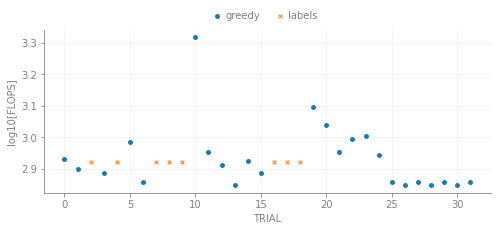

In [2]:
opt.plot_trials('flops')

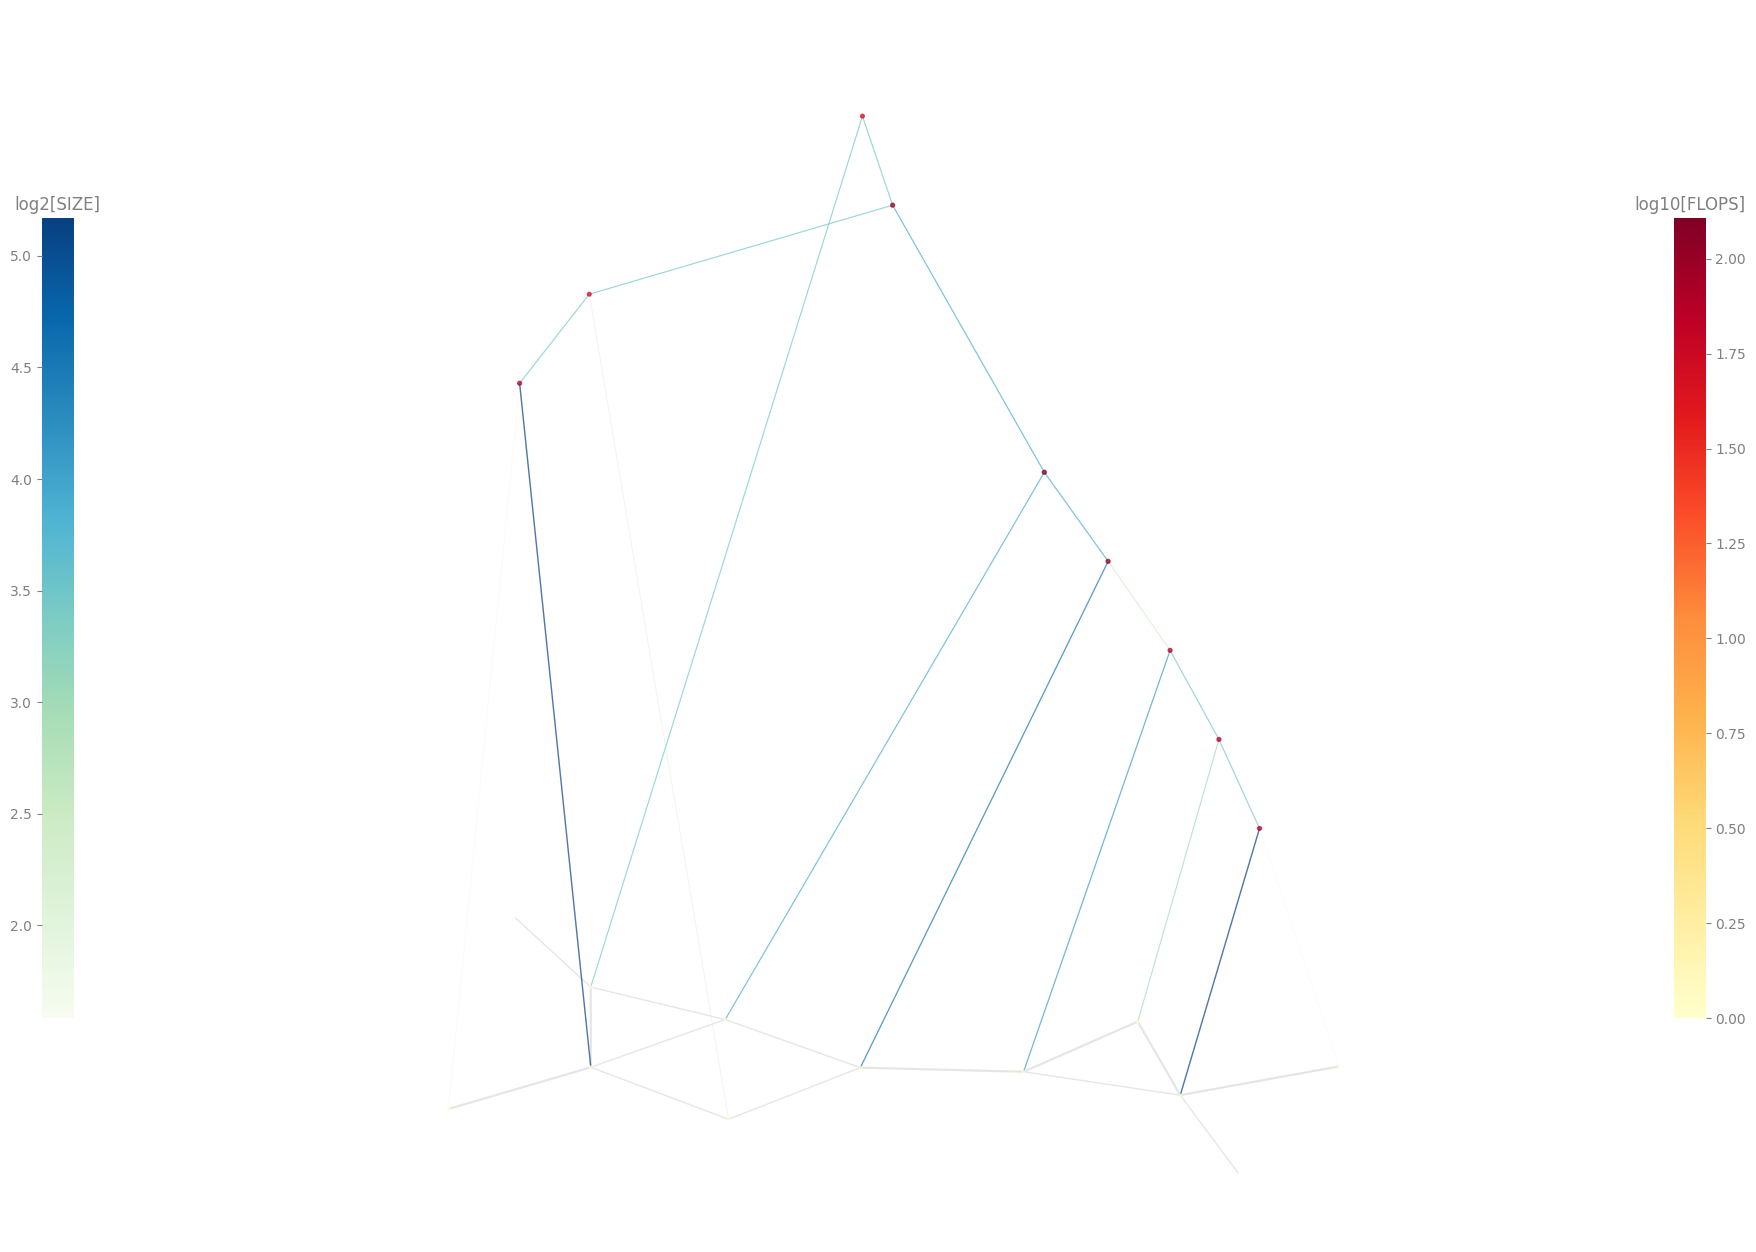

In [3]:
tree.plot_tent(order=True, figsize=(16, 16))